In [28]:
# Importing numpy and matplotlib for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# This class implements a simple anomaly detection algorithm
class AnomalyDetector:

    def __init__(self, data):

        """
        Initializes the class with the provided input data.
        """

        if not isinstance(data, np.ndarray):
            raise ValueError('Data should be a numpy array.')
        if data.ndim != 1:
            raise ValueError('Data should be a one-dimensional array.')
        if data.size == 0:
            raise ValueError('Data must not be empty.')
        if not np.issubdtype(data.dtype, np.number):
            raise ValueError('Data should not contain non-numerical values.')

        self.data = data
        self.mean = np.mean(data)
        self.std_dev = np.std(data)

    def detect_anomalies(self):

        """
        Detects anomalies in the data.
        Returns: Index of anomaly
        """

        threshold = self.std_dev * 2
        anomalies = np.where(np.abs(self.data - self.mean) > threshold)[0]
        return anomalies
    
    def plot_anomalies(self):

        """
        Plots the data and highlights the anomalies for visualization.
        """

        anomalies = self.detect_anomalies()
        plt.figure(figsize=(8, 4))
        plt.plot(self.data, label='Data', linestyle='-', alpha = 0.6)
        plt.scatter(anomalies, self.data[anomalies], color = 'red', label = 'Anomaly', zorder = 3)
        plt.axhline(self.mean, color = 'green', linestyle = '--', label = 'Mean')
        plt.axhline(self.mean + 2 * self.std_dev, color = 'orange', linestyle = '--', label = '+2 Std Dev')
        plt.axhline(self.mean - 2 * self.std_dev, color = 'orange', linestyle = '--', label = '-2 Std Dev')
        plt.legend(loc = 'best', title = 'Parameters')
        plt.title('Anomaly Detection')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.show()
        

Anomalies detected at [13] index


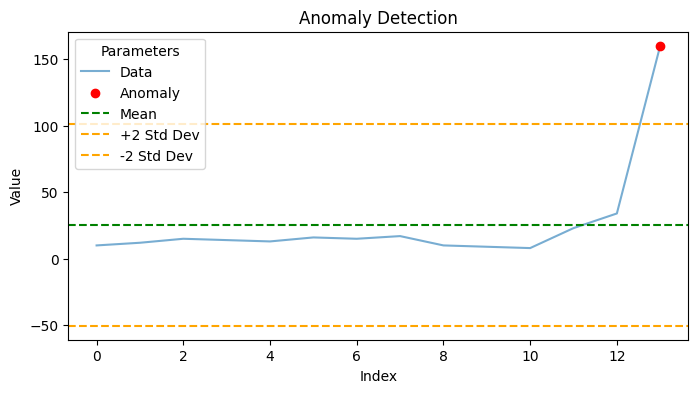

In [33]:
# Example usage
data = np.array([10, 12, 15, 14, 13, 16, 15, 17, 10, 9, 8, 23, 34, 160])
detector = AnomalyDetector(data)
anomalies = detector.detect_anomalies()
print('Anomalies detected at' , anomalies, 'index')
detector.plot_anomalies()